In [4]:
import numpy as np
import pandas as pd
import updated_data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer,FunctionTransformer,PowerTransformer, LabelEncoder,MinMaxScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
%pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import dagshub
dagshub.init(repo_owner='Adrshp806', repo_name='swiggy-delivery-time-predictions', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=bb26aa1c-b9c3-4496-bba4-86831e53fe69&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=6be88f3ab1290290d750c1f7a45642b13610e73467b99e3d8b98d8ba49d1371f




Accessing as Adrshp806

Initialized MLflow to track repo "Adrshp806/swiggy-delivery-time-predictions"

Repository Adrshp806/swiggy-delivery-time-predictions initialized!

In [8]:
from sklearn import set_config
set_config(transform_output='pandas')

# Load the Data

In [10]:
df = pd.read_csv('swiggy.csv')

In [11]:
updated_data_clean_utils.perform_data_cleaning(df)

In [13]:
df = pd.read_csv('swiggy_cleaned.csv')

In [14]:
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,2,snack,motorcycle,0.0,no,urban,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [15]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [16]:
#droping some columns which is not requiered to use
column_to_drop= [
    'rider_id',
    'restaurant_latitude',
    'restaurant_longitude',
    'delivery_longitude',
    'delivery_latitude',
    'order_date',
    'order_time_hour',
    'order_day',
    'city_name',
    'order_day_of_week',
    'order_month']
df.drop(columns=column_to_drop,inplace=True)
df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


# Drop Missing Values

In [22]:
import mlflow
from sklearn.model_selection import train_test_split

In [18]:
# set the tracking serevr
mlflow.set_tracking_uri("https://dagshub.com/Adrshp806/swiggy-delivery-time-predictions.mlflow")

In [19]:
#mlflow experiment
mlflow.set_experiment("Exp 1- Keep Vs Drop Missing Values")

2024/12/23 12:54:37 INFO mlflow.tracking.fluent: Experiment with name 'Exp 1- Keep Vs Drop Missing Values' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/2f8f0d5d36e54bfe83c0d874f530d5fc', creation_time=1734958476964, experiment_id='0', last_update_time=1734958476964, lifecycle_stage='active', name='Exp 1- Keep Vs Drop Missing Values', tags={}>

In [20]:
temp_df = df.copy().dropna()

In [24]:
#split into x and Y
x = temp_df.drop(columns=['time_taken'])
y = temp_df['time_taken']

In [25]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30156, 15), (7539, 15), (30156,), (7539,))

In [27]:
x_train.isna().sum()

,0
age,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [41]:
#for basic preprocessing
num_cols = ["age","ratings","pickup_time_minutes","distance"]
nominal_cat_cols = [
    "weather","type_of_order","type_of_vehicle","festival","city_type",
    "is_weekend","order_time_of_day"
]

ordinal_cat_cols = ["traffic","distance_type"]

In [42]:
# generating for ordinal encoding
traffic_order = ['jam','medium','high','low']
distance_type_order = ['medium', 'short', 'long', 'very_long']

In [43]:
#build a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("scale",MinMaxScaler(),num_cols),
    ("nominal_encode",OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False),nominal_cat_cols),
    ("ordinal_encode",OrdinalEncoder(categories=[traffic_order,distance_type_order]),ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['jam', 'medium',
                                                             'high', 'low'],
                                                            ['medium', 'short',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [44]:
#transform the data
x_train_trans = preprocessor.fit_transform(x_train)
x_test_trans = preprocessor.transform(x_test)

In [45]:
#transfor target categories
pt = PowerTransformer()
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [47]:
pt.lambdas_

array([0.32446096])

In [48]:
y_train_pt

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


In [50]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor()

# Fit the model to your training data
rf.fit(x_train_trans, y_train_pt.values.ravel())


RandomForestRegressor()

In [51]:
#get the prediction
y_pred_train = rf.predict(x_train_trans)
y_pred_test = rf.predict(x_test_trans)

In [52]:
#get the actual prediction values
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"Train MAE: {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"the test r2 score is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

Train MAE: 1.16 minutes
the test r2 score is 3.12 minutes


In [57]:
print(f"train r2 {r2_score(y_train,y_pred_train_org)}")
r2_score(y_test,y_pred_test_org)

train r2 0.9753099481000713


0.8227040769683024

In [58]:
# calculate the cross val score
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf,x_train_trans,y_train_pt.values.ravel(),cv=5,scoring="r2",n_jobs=-1)

cv_score

array([0.80466901, 0.80635   , 0.80361794, 0.80546022, 0.807606  ])

In [59]:
cv_score.mean()

0.8055406325055326

<Axes: >

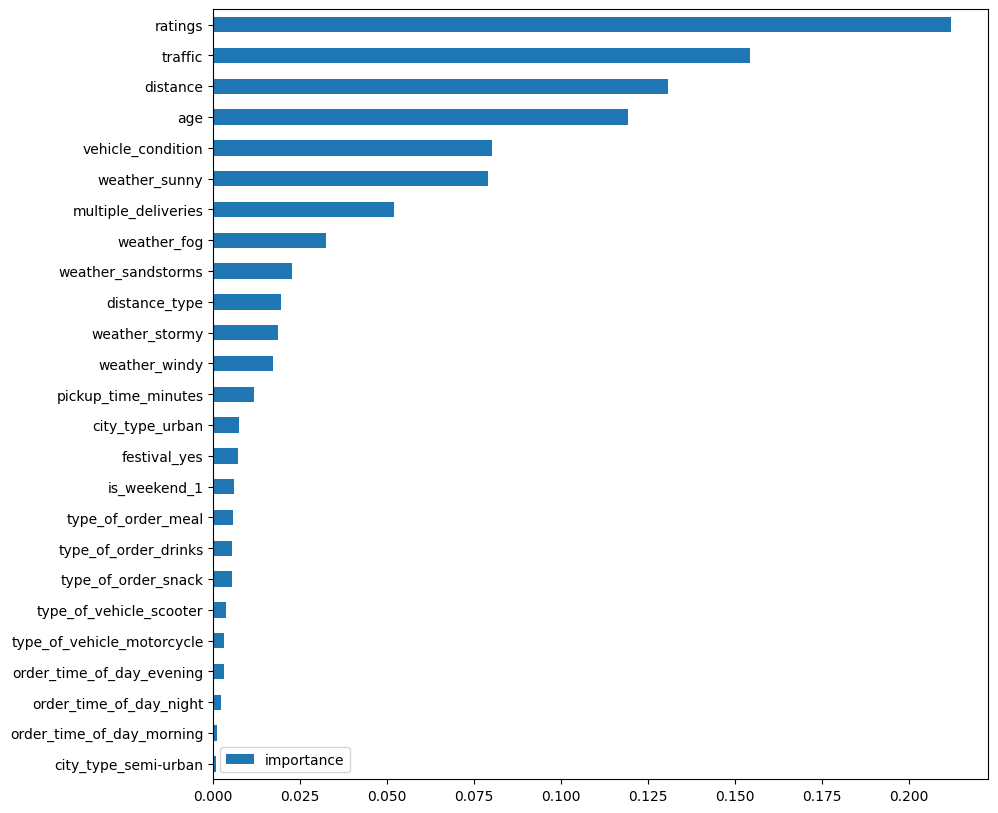

In [60]:
#feature importance plot
(
    pd.DataFrame(rf.feature_importances_,
                 index=x_train_trans.columns,
                 columns=["importance"])
    .sort_values("importance")
    .plot(kind="barh",figsize=(10,10))

)

In [61]:
# log experiment
with mlflow.start_run(run_name="Drop Missing Values"):
  #mlflow log experiment type
  mlflow.log_param("experietnt_type","Drop Missing Valuec")
  #log model params
  mlflow.log_params(rf.get_params())

  #log metrics
  mlflow.log_metric("training_error", mean_absolute_error(y_train,y_pred_train_org))
  mlflow.log_metric("test_error", mean_absolute_error(y_test,y_pred_test_org))
  mlflow.log_metric("training_r2", r2_score(y_train,y_pred_train_org))
  mlflow.log_metric("test_r2", r2_score(y_test,y_pred_test_org))
  mlflow.log_metric("cross_val", cv_score.mean())

  # #log artifacts
  # mlflow.sklearn.log_model(rf,"model")

🏃 View run Drop Missing Values at: https://dagshub.com/Adrshp806/swiggy-delivery-time-predictions.mlflow/#/experiments/0/runs/7c6c8c1bedb74524be348f6b80439cba
🧪 View experiment at: https://dagshub.com/Adrshp806/swiggy-delivery-time-predictions.mlflow/#/experiments/0


# Impute Missing Values

In [65]:
temp_df = df.copy()

In [66]:
# split into x and Y
x = temp_df.drop(columns=['time_taken'])
y = temp_df['time_taken']

In [75]:
x.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [78]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
#transform target column
pt = PowerTransformer()
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [80]:
#percantage of rows in data having missing values
(
    x_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2)*100
)

17.0

# Impute pipeline


In [81]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [82]:
x_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [83]:
#feature to fill values with mode
feature_to_fill_mode = ['multiple_deliveries','festival','city_type']
feature_to_fill_missing = [col for col in nominal_cat_cols if col not in feature_to_fill_mode]
feature_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [86]:
from math import remainder
#simple imputer to fill categorical vars with mode
simple_imputer = ColumnTransformer(transformers=[
    ("mode)imputer",SimpleImputer(strategy="most_frequent"),feature_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing"),feature_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)
simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode)imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'is_weekend', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [87]:
simple_imputer.fit_transform(x_train)

,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
11029,1.0,no,metropolitian,windy,snack,electric_scooter,0,evening,26.0,4.7,jam,2,10.0,9.177684,medium
15665,1.0,no,metropolitian,windy,drinks,motorcycle,0,afternoon,21.0,4.9,medium,2,5.0,6.081536,medium
14475,1.0,no,metropolitian,stormy,meal,scooter,1,missing,NaN,NaN,low,2,NaN,1.554563,short
29199,1.0,no,metropolitian,windy,buffet,motorcycle,0,evening,32.0,4.7,medium,0,15.0,20.852271,very_long
22514,0.0,no,urban,sandstorms,meal,scooter,0,night,34.0,4.9,jam,1,5.0,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,no,metropolitian,sandstorms,meal,scooter,0,evening,29.0,4.7,jam,2,5.0,12.464367,long
44732,0.0,no,urban,cloudy,buffet,motorcycle,0,morning,36.0,4.8,low,0,10.0,1.520432,short
38158,0.0,no,metropolitian,fog,buffet,scooter,0,evening,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,windy,meal,scooter,1,afternoon,25.0,4.9,medium,2,5.0,7.760938,medium


In [88]:
knn_imputer = KNNImputer(n_neighbors=5)

In [89]:
#do basic preprocessing
num_cols = ["age","ratings","pickup_time_minutes","distance"]
nominal_cat_cols = [
    "weather","type_of_order","type_of_vehicle","festival","city_type",
    "is_weekend","order_time_of_day"
]

ordinal_cat_cols = ["traffic","distance_type"]

In [97]:
#generate oreder for ordinal encoding

traffic_order = ['low','medium','high','jam']
distance_type_order = ['short','medium', 'long', 'very_long']

In [91]:
for col in ordinal_cat_cols:
  print(col, x_train[col].unique())

traffic ['jam' 'medium' 'low' 'high' nan]
distance_type ['medium' 'short' 'very_long' 'long' nan]


In [98]:
#build a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("scale",MinMaxScaler(),num_cols),
    ("nominal_encode",OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False),nominal_cat_cols),
    ("ordinal_encode",OrdinalEncoder(categories=[traffic_order,distance_type_order],encoded_missing_value=999,handle_unknown="use_encoded_value",unknown_value=-1),ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [99]:
preprocessor.fit_transform(x_train)

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,weather_nan,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_electric_scooter,type_of_vehicle_motorcycle,type_of_vehicle_scooter,festival_yes,festival_nan,city_type_semi-urban,city_type_urban,city_type_nan,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,order_time_of_day_nan,traffic,distance_type,vehicle_condition,multiple_deliveries
11029,0.315789,0.88,0.5,0.395429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2,1.0
15665,0.052632,0.96,0.0,0.236688,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0
14475,NaN,NaN,NaN,0.004588,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
29199,0.631579,0.88,1.0,0.993990,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0,1.0
22514,0.736842,0.96,0.0,0.389195,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.88,0.0,0.563939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2,0.0
44732,0.842105,0.92,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
38158,0.842105,0.76,0.5,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,1,0.0
860,0.263158,0.96,0.0,0.322792,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0


In [100]:
preprocessor.fit_transform(x_train).isna().sum().loc[lambda ser : ser.ge(1)]

,0
age,1470
ratings,1510
pickup_time_minutes,1298
distance,2931
multiple_deliveries,795


In [101]:
processing_pipeline = Pipeline(steps=[
                                  ("simple_imputer",simple_imputer),
                                  ("preprocessor",preprocessor),
                                  ("knn_imputer",knn_imputer)
                                  ])
processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode)imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehi...
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [104]:
model_pipe = Pipeline(steps=[
                              ("preprocessing",processing_pipeline),
                              ("model",rf)
])
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode)imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [105]:
# fit the pipeline on data
model_pipe.fit(x_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode)imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [107]:
#get prediction
y_pred_train = model_pipe.predict(x_train)
y_pred_test = model_pipe.predict(x_test)

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [109]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [110]:
print(f"Train MAE: {mean_absolute_error(y_train,y_pred_train_org):.2f}minutes")
print(f"Test MAE: {mean_absolute_error(y_test,y_pred_test_org):.2f}minutes")

Train MAE: 1.22minutes
Test MAE: 3.31minutes


In [111]:
print(f"train r2 {r2_score(y_train,y_pred_train_org)}")
r2_score(y_test,y_pred_test_org)

train r2 0.9713006816224593


0.7999983960876206

In [112]:
#calculate the cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_pipe,x_train,y_train_pt.values.ravel(),cv=5,scoring="r2",n_jobs=-1)
score


array([0.77917038, 0.78317942, 0.78330712, 0.7779768 , 0.78016692])

In [113]:
#mean score
score.mean()

0.7807601258891322

In [114]:
# log experiment
with mlflow.start_run(run_name="Impute Missing Values"):
  #mlflow log experiment type
  mlflow.log_param("experietnt_type","Impute Missing Values")
  #log model params
  mlflow.log_params(rf.get_params())

  #log metrics
  mlflow.log_metric("training_error", mean_absolute_error(y_train,y_pred_train_org))
  mlflow.log_metric("test_error", mean_absolute_error(y_test,y_pred_test_org))
  mlflow.log_metric("training_r2", r2_score(y_train,y_pred_train_org))
  mlflow.log_metric("test_r2", r2_score(y_test,y_pred_test_org))
  mlflow.log_metric("cross_val", cv_score.mean())

  # #log artifacts
  # mlflow.sklearn.log_model(rf,"model")

🏃 View run Impute Missing Values at: https://dagshub.com/Adrshp806/swiggy-delivery-time-predictions.mlflow/#/experiments/0/runs/53a6ffd571d44023bb82b23af345da3d
🧪 View experiment at: https://dagshub.com/Adrshp806/swiggy-delivery-time-predictions.mlflow/#/experiments/0
